In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
df = pd.read_csv('./selected_indicators/PMD_raw.csv')
df_new =  (
    df.drop(['code', 'iso'], axis=1)
    .set_index(['country']).rename_axis([None])
    .T.reset_index() # Transpose teh original dataset 
    .assign(index=lambda x: x['index'].str[-4:])
    .set_index('index')
    .rename_axis(None)
    .replace(-8888, np.nan)
)

df_new

,Afghanistan,Albania,Algeria,Andorra,Angola,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Viet Nam,Wallis and Futuna Islands,Western Sahara,Yemen,Zambia,Zimbabwe
1990,1057.881112,1224.498054,2492.608990,451.892667,641.746188,NaN,1072.520506,961.436343,2297.785439,NaN,...,597.148707,2329.190685,537.337074,1336.753835,659.967437,NaN,NaN,903.583024,707.696635,740.146764
1991,989.747064,1224.886220,2504.490934,432.260410,639.091187,NaN,1079.379264,955.361463,2344.887925,NaN,...,561.537847,2479.925976,572.699055,1308.975159,672.279992,NaN,NaN,895.548044,712.905611,742.739742
1992,948.532258,1158.329204,2523.208741,418.206743,643.115755,NaN,1091.546009,956.862122,2510.802042,NaN,...,571.094579,2690.527346,605.681712,1313.558958,685.025416,NaN,NaN,903.866034,718.531921,764.522897
1993,963.878725,1092.233721,2545.431232,401.608897,656.752149,NaN,1138.822808,936.236192,2582.229899,NaN,...,581.909082,2986.248321,631.727842,1305.061931,698.585972,NaN,NaN,922.896724,722.574257,775.264508
1994,984.252444,1015.499487,2566.661352,390.330786,670.216864,NaN,1142.735333,906.818447,2481.220044,NaN,...,567.804843,3264.801790,661.129417,1337.735504,712.417286,NaN,NaN,949.414374,729.122136,799.408244
1995,977.933384,999.841327,2574.548782,378.832112,677.124072,NaN,1149.759416,893.314099,2419.994693,NaN,...,565.352919,3477.183195,668.445969,1324.035920,727.057969,NaN,NaN,976.315619,736.676493,822.363050
1996,976.647301,1001.820208,2582.332385,374.196035,682.652285,NaN,1092.713683,878.488101,2395.240058,NaN,...,550.163813,3654.964525,685.850669,1283.082813,742.933942,NaN,NaN,1028.038861,744.555995,834.508081
1997,981.367199,997.971836,2597.443836,370.651333,703.118624,NaN,1068.442668,851.064788,2277.292156,NaN,...,532.510932,3703.464856,698.540088,1234.930761,762.033110,NaN,NaN,1118.108671,756.545251,867.053017
1998,984.151063,1008.424396,2594.611812,370.221966,737.738903,NaN,1047.695191,828.965571,2215.624854,NaN,...,530.402368,3780.875795,708.443401,1261.420134,784.082344,NaN,NaN,1215.533653,773.516165,918.153722
1999,986.332236,1040.289517,2607.643696,367.710227,767.260689,NaN,1028.501018,801.378666,2200.337038,NaN,...,515.641498,3818.477458,723.571225,1251.381207,809.706681,NaN,NaN,1314.602499,787.670807,971.745298


In [9]:
selected_countries = ['United States of America', 'China', 'India', 'Germany', 'South Africa', 'Australia', 'Brazil'] 
selected_df = df_new.loc[:, selected_countries]
selected_df

,United States of America,China,India,Germany,South Africa,Australia,Brazil
1990,767.010465,1816.533270,1841.310090,1093.396608,1827.525508,295.391128,978.828352
1991,746.178124,1846.147261,1830.133431,1052.780847,1832.505502,279.298381,948.738158
1992,723.082185,1874.944913,1819.711916,1003.053938,1912.197695,270.514658,940.874598
1993,716.181330,1902.204828,1802.266863,968.012753,1831.870889,256.933472,954.847936
1994,699.374568,1918.225225,1788.238198,923.859236,1892.612428,249.992143,945.101360
1995,685.628432,1929.699793,1771.816938,879.136567,1907.533780,239.801583,932.196297
1996,664.768581,1949.357773,1799.425242,834.329120,1979.884653,232.881650,923.868117
1997,643.244144,1969.952299,1890.768745,784.088609,2207.090604,223.665541,900.633023
1998,625.350945,1995.641424,1941.900501,733.370538,2245.947749,214.388237,893.037367
1999,612.165815,2031.755117,1957.981735,689.174029,2219.072047,205.870906,881.397864


In [10]:
df_long = (selected_df.reset_index()
           .melt(id_vars='index', var_name='country', value_name='value')
           .astype({'index': 'float64'}))
df_long

,index,country,value
0,1990.0,United States of America,767.010465
1,1991.0,United States of America,746.178124
2,1992.0,United States of America,723.082185
3,1993.0,United States of America,716.181330
4,1994.0,United States of America,699.374568
...,...,...,...
205,2015.0,Brazil,568.750678
206,2016.0,Brazil,568.007193
207,2017.0,Brazil,552.845585
208,2018.0,Brazil,546.055470


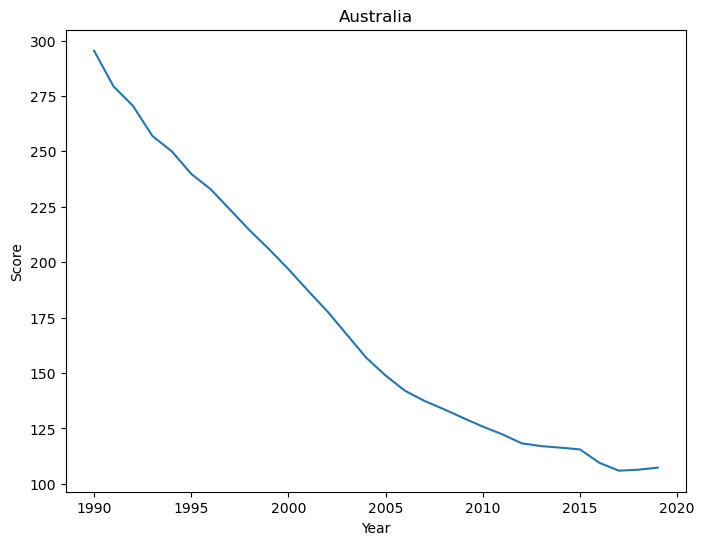

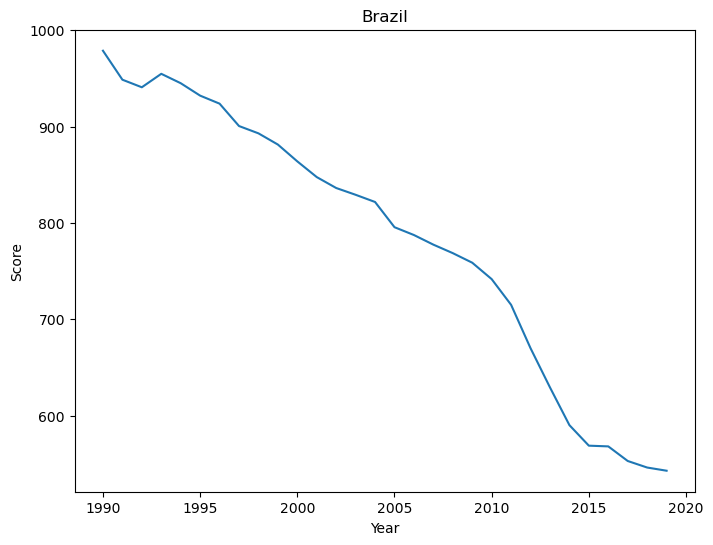

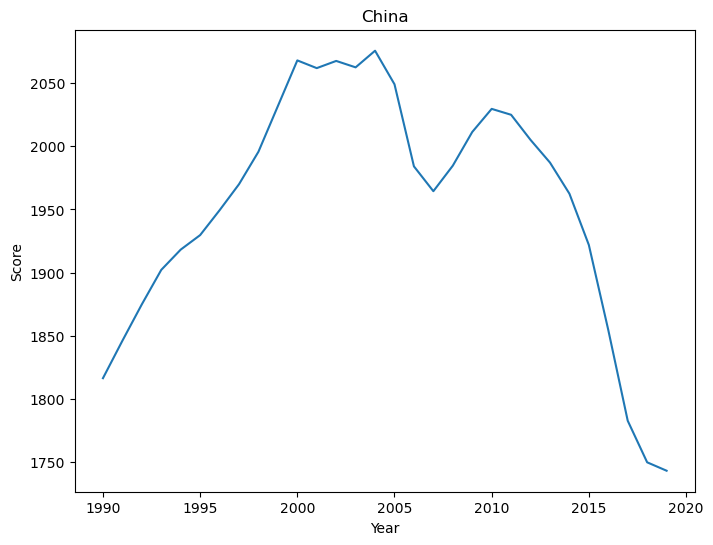

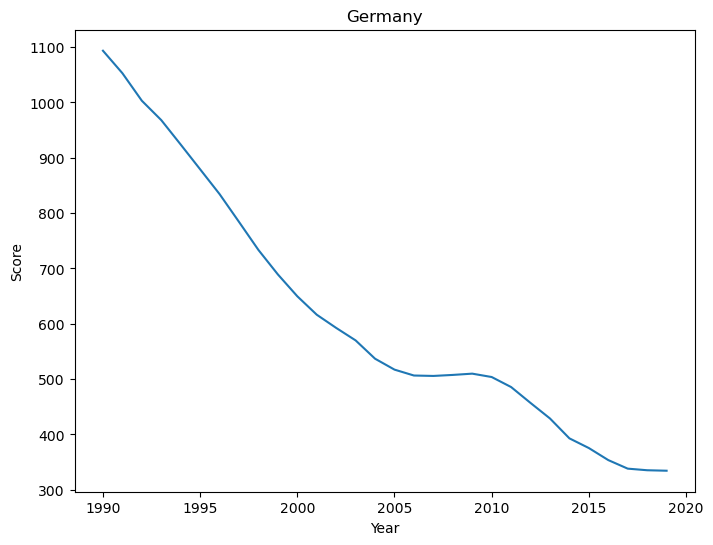

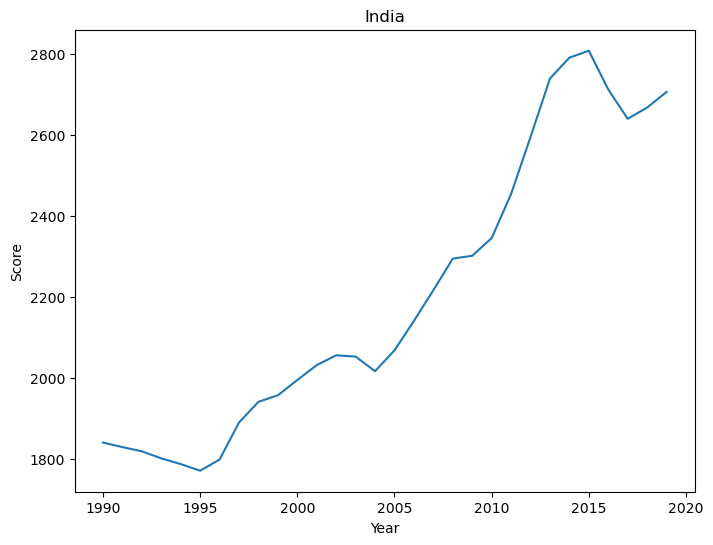

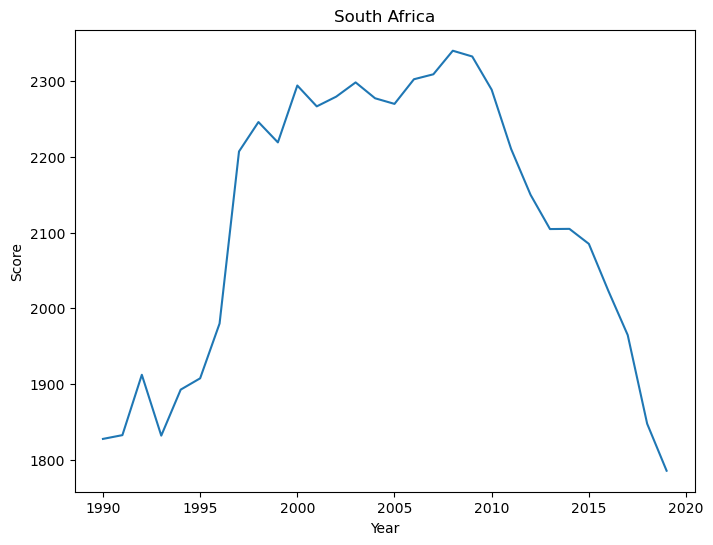

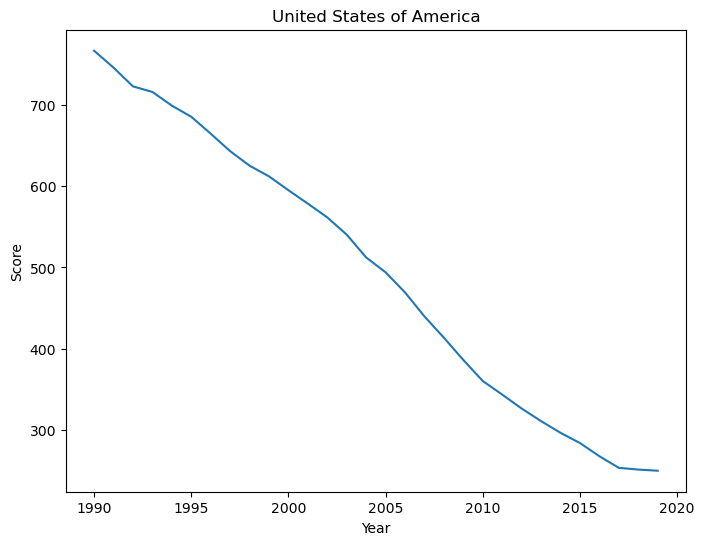

In [11]:
for country, data in df_long.groupby('country'):
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.plot(data['index'], data['value'], label=country)
    ax.set_title(country)
    ax.set_xlabel('Year')
    ax.set_ylabel('Score')

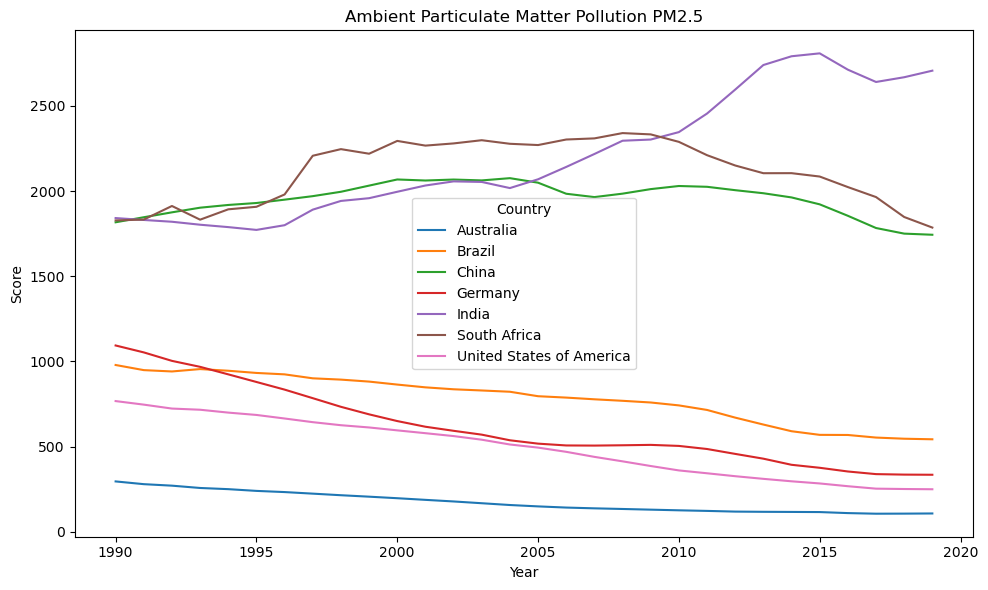

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

for country, data in df_long.groupby('country'):
    ax.plot(data['index'], data['value'], label=country)

ax.set_title('Ambient Particulate Matter Pollution PM2.5')
ax.set_xlabel('Year')
ax.set_ylabel('Score')
ax.legend(loc='best', title='Country') 

fig.tight_layout()
plt.savefig("PMD.png")
plt.show()